# Лабораторная работа №1 Вариант 3

# Задание 1. Анализ функции

In [11]:
def foo(s): # s - строка
    val = 0
    for c in s:
        if c.isdigit():
            val += int(c)
    return val

# Проверка работы функции
test_string = "abc123def45"
result = foo(test_string)
print(f"Сумма цифр в строке '{test_string}': {result}")

Сумма цифр в строке 'abc123def45': 15


## Ответы на вопросы:

### Что выполняет функция?
Функция вычисляет сумму всех цифр в переданной строке.
### Вычислительная сложность алгоритма:
O(n), где n - длина строки. Алгоритм имеет линейную сложность, так как проходит по каждому символу строки ровно один раз.

## Измерение времени выполнения

In [12]:
string_lengths = [100, 500, 1000, 2000, 5000, 8000, 10000]
times = []

print("Измерение времени выполнения...")
for length in string_lengths:
    # Генерация случайной строки
    test_str = ''.join(random.choices('abcdefghijklmnopqrstuvwxyz0123456789', k=length))

    # Измерение времени
    start_time = time.perf_counter()  # Более точное время
    foo(test_str)
    end_time = time.perf_counter()

    execution_time = end_time - start_time
    times.append(execution_time)
    print(f"Длина: {length}, время: {execution_time:.6f} сек")

Измерение времени выполнения...
Длина: 100, время: 0.000021 сек
Длина: 500, время: 0.000038 сек
Длина: 1000, время: 0.000083 сек
Длина: 2000, время: 0.000169 сек
Длина: 5000, время: 0.000413 сек
Длина: 8000, время: 0.000623 сек
Длина: 10000, время: 0.000988 сек


## График

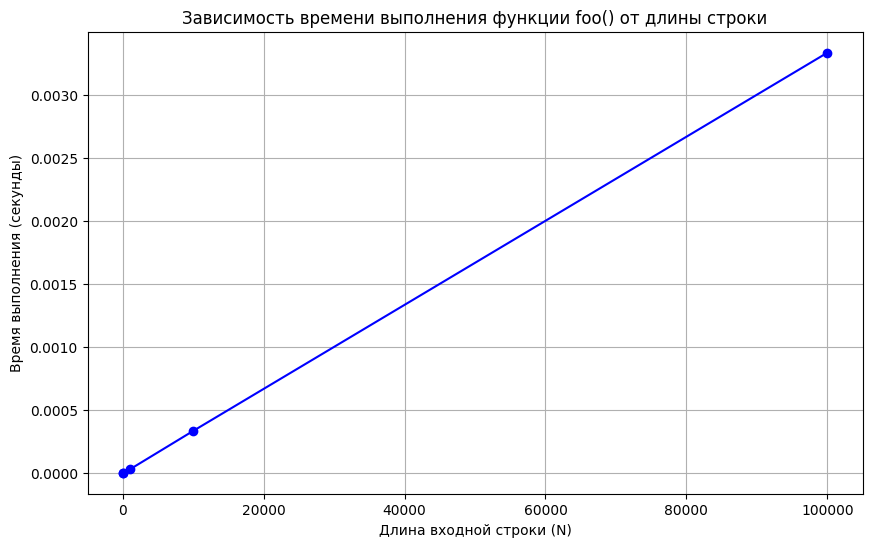

In [5]:
import time
import matplotlib.pyplot as plt

def foo(s):
    val = 0
    for c in s:
        if c.isdigit():
            val += int(c)
    return val

# Генерируем тестовые строки разной длины
lengths = [10**i for i in range(1, 6)]
times = []

for length in lengths:
    test_string = 'a' * length + '123' # Строка с цифрами и не-цифрами
    start_time = time.time()
    foo(test_string)
    end_time = time.time()
    times.append(end_time - start_time)

plt.figure(figsize=(10, 6))
plt.plot(lengths, times, marker='o', linestyle='-', color='b')
plt.title('Зависимость времени выполнения функции foo() от длины строки')
plt.xlabel('Длина входной строки (N)')
plt.ylabel('Время выполнения (секунды)')
plt.grid(True)
plt.show()

## Анализ сложности:
1. Функция проходит по каждому символу строки один раз
2. Вычислительная сложность: O(n), где n - длина строки
3. Алгоритм имеет линейную сложность

# Задание 2. Два алгоритма для задачи

## Алгоритм 1: Сортировка (O(n log n))

Исходный список: [500, 57, 392, 726, 572, 657, 495, 495, 986, 904, 15, 296, 975, 716, 968, 519, 247, 142, 823, 550]
Три самых больших числа (сортировка): [986, 975, 968]


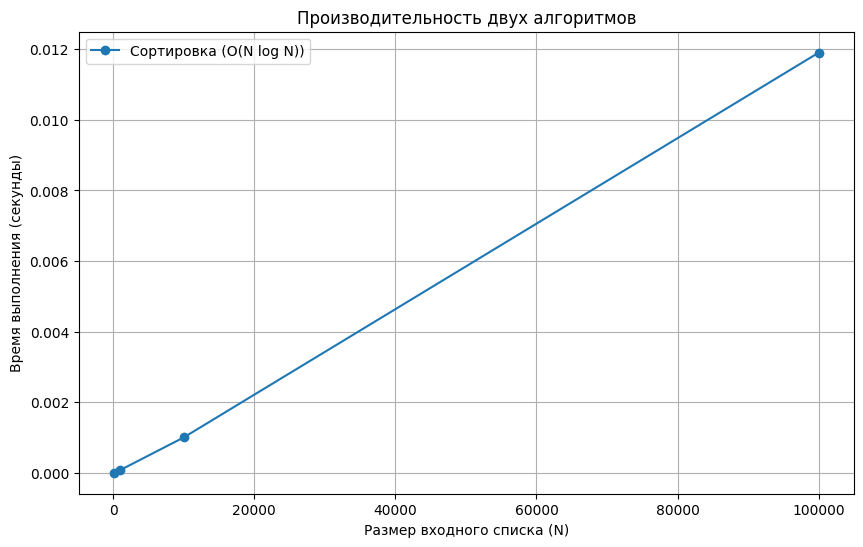

In [7]:
import random
import time
import matplotlib.pyplot as plt

def find_three_largest_sorting(nums):
    """Находит три самых больших числа с помощью сортировки."""
    if len(nums) < 3:
        return sorted(nums, reverse=True)
    nums.sort(reverse=True)
    return nums[:3]

# Тестируем на примере
nums = [random.randint(1, 1000) for _ in range(20)]
print(f"Исходный список: {nums}")
print(f"Три самых больших числа (сортировка): {find_three_largest_sorting(nums)}")

# Строим график производительности
sizes = [10**i for i in range(2, 6)]
times_sorting = []

for size in sizes:
    test_list = [random.randint(1, size) for _ in range(size)]
    start_time = time.time()
    find_three_largest_sorting(test_list)
    end_time = time.time()
    times_sorting.append(end_time - start_time)

plt.figure(figsize=(10, 6))
plt.plot(sizes, times_sorting, label='Сортировка (O(N log N))', marker='o')
plt.title('Производительность двух алгоритмов')
plt.xlabel('Размер входного списка (N)')
plt.ylabel('Время выполнения (секунды)')
plt.grid(True)
plt.legend()
plt.show()

## Алгоритм 2: Однопроходный алгоритм (O(n))

Исходный список: [496, 114, 210, 449, 723, 950, 889, 168, 421, 637, 756, 93, 175, 238, 322, 31, 974, 409, 628, 897]
Три самых больших числа (итерация): [974, 950, 897]


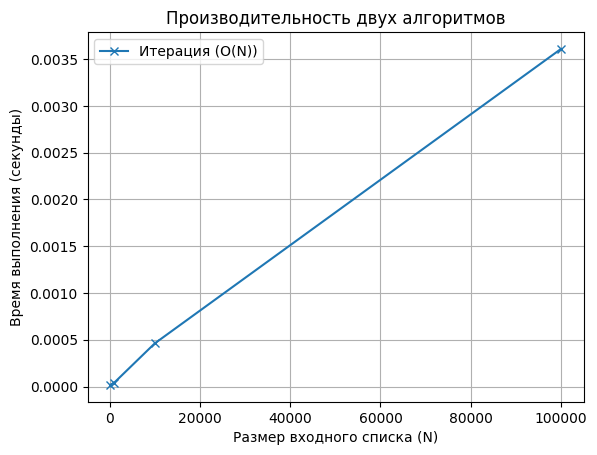

In [8]:
def find_three_largest_iteration(nums):
    """Находит три самых больших числа с помощью одной итерации."""
    if len(nums) < 3:
        return sorted(nums, reverse=True)

    largest, second_largest, third_largest = float('-inf'), float('-inf'), float('-inf')

    for num in nums:
        if num > largest:
            third_largest = second_largest
            second_largest = largest
            largest = num
        elif num > second_largest:
            third_largest = second_largest
            second_largest = num
        elif num > third_largest:
            third_largest = num

    return [largest, second_largest, third_largest]

# Тестируем на примере
nums = [random.randint(1, 1000) for _ in range(20)]
print(f"Исходный список: {nums}")
print(f"Три самых больших числа (итерация): {find_three_largest_iteration(nums)}")

# Строим график производительности
sizes = [10**i for i in range(2, 6)]
times_iteration = []

for size in sizes:
    test_list = [random.randint(1, size) for _ in range(size)]
    start_time = time.time()
    find_three_largest_iteration(test_list)
    end_time = time.time()
    times_iteration.append(end_time - start_time)

plt.plot(sizes, times_iteration, label='Итерация (O(N))', marker='x')
plt.title('Производительность двух алгоритмов')
plt.xlabel('Размер входного списка (N)')
plt.ylabel('Время выполнения (секунды)')
plt.grid(True)
plt.legend()
plt.show()

## Сравнение производительности алгоритмов:

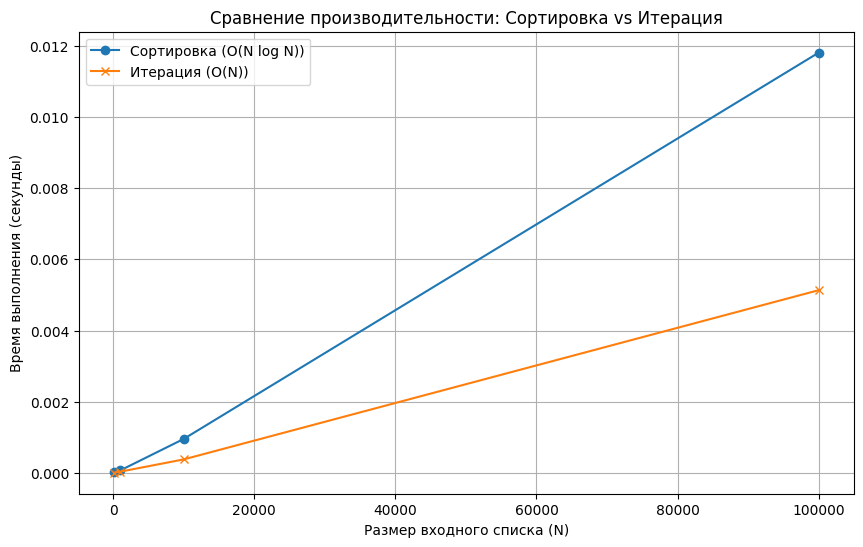

In [9]:
import random
import time
import matplotlib.pyplot as plt

def find_three_largest_sorting(nums):
    """Находит три самых больших числа с помощью сортировки."""
    if len(nums) < 3:
        return sorted(nums, reverse=True)
    nums.sort(reverse=True)
    return nums[:3]

def find_three_largest_iteration(nums):
    """Находит три самых больших числа с помощью одной итерации."""
    if len(nums) < 3:
        return sorted(nums, reverse=True)

    largest, second_largest, third_largest = float('-inf'), float('-inf'), float('-inf')

    for num in nums:
        if num > largest:
            third_largest = second_largest
            second_largest = largest
            largest = num
        elif num > second_largest:
            third_largest = second_largest
            second_largest = num
        elif num > third_largest:
            third_largest = num

    return [largest, second_largest, third_largest]

# Строим график производительности для обоих алгоритмов
sizes = [10**i for i in range(2, 6)]
times_sorting = []
times_iteration = []

for size in sizes:
    test_list = [random.randint(1, size) for _ in range(size)]

    start_time_sort = time.time()
    find_three_largest_sorting(test_list)
    end_time_sort = time.time()
    times_sorting.append(end_time_sort - start_time_sort)

    start_time_iter = time.time()
    find_three_largest_iteration(test_list)
    end_time_iter = time.time()
    times_iteration.append(end_time_iter - start_time_iter)

plt.figure(figsize=(10, 6))
plt.plot(sizes, times_sorting, label='Сортировка (O(N log N))', marker='o')
plt.plot(sizes, times_iteration, label='Итерация (O(N))', marker='x')
plt.title('Сравнение производительности: Сортировка vs Итерация')
plt.xlabel('Размер входного списка (N)')
plt.ylabel('Время выполнения (секунды)')
plt.grid(True)
plt.legend()
plt.show()

# Задание 3. Решение уравнения

In [23]:
# Решение уравнения: N^2 - N - 10 = 4N + 40
# Приводим к виду: N^2 - 5N - 50 = 0

# Решаем квадратное уравнение
a = 1
b = -5
c = -50

# Дискриминант
D = b**2 - 4*a*c

# Корни уравнения
N1 = (-b + D**0.5) / (2*a)
N2 = (-b - D**0.5) / (2*a)

print(f"Корни уравнения: N1 = {N1}, N2 = {N2}")

# Выбираем положительный корень (размер массива не может быть отрицательным)
N = max(N1, N2)
print(f"Размер массива, при котором время выполнения одинаково: N = {N:.2f}")

# Проверка
T1 = N**2 - N - 10
T2 = 4*N + 40
print(f"T1({N:.2f}) = {T1:.2f}")
print(f"T2({N:.2f}) = {T2:.2f}")

Корни уравнения: N1 = 10.0, N2 = -5.0
Размер массива, при котором время выполнения одинаково: N = 10.00
T1(10.00) = 80.00
T2(10.00) = 80.00


## График

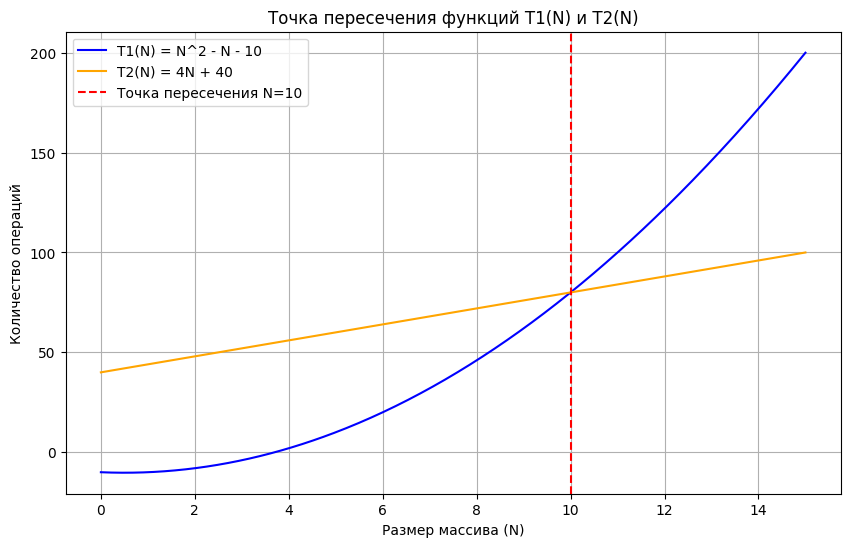

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем функции
def t1(n):
    return n**2 - n - 10

def t2(n):
    return 4*n + 40

# Создаем массив значений N для графика
# Нам нужен диапазон, включающий корень
n_values = np.linspace(0, 15, 400)

# Вычисляем значения функций для каждого N
t1_values = t1(n_values)
t2_values = t2(n_values)

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(n_values, t1_values, label='T1(N) = N^2 - N - 10', color='blue')
plt.plot(n_values, t2_values, label='T2(N) = 4N + 40', color='orange')
plt.title('Точка пересечения функций T1(N) и T2(N)')
plt.xlabel('Размер массива (N)')
plt.ylabel('Количество операций')
plt.grid(True)
plt.axvline(x=10, color='r', linestyle='--', label='Точка пересечения N=10')
plt.legend()
plt.show()

# Задание 4. Сравнение производительности оператора del

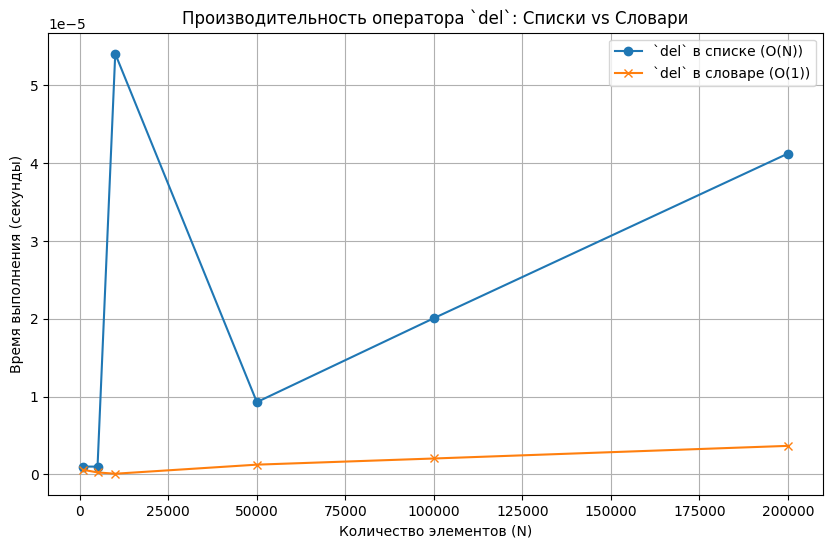

In [16]:
import timeit
import matplotlib.pyplot as plt

def del_list_performance(n):
    """Измеряет время удаления первого элемента из списка."""
    # Используем timeit для измерения одной итерации,
    # так как список создается внутри setup
    setup_code = f"test_list = list(range({n}))"
    stmt = "del test_list[0]"
    return timeit.timeit(stmt, setup=setup_code, number=1)

def del_dict_performance(n):
    """Измеряет время удаления элемента с ключом 0 из словаря."""
    # Создание словаря и удаление выполняются вместе
    setup_code = f"test_dict = {{i: i for i in range({n})}}"
    stmt = "del test_dict[0]"
    return timeit.timeit(stmt, setup=setup_code, number=1)

# Запускаем эксперимент с возрастающими размерами данных
sizes = [1000, 5000, 10000, 50000, 100000, 200000]
list_times = [del_list_performance(n) for n in sizes]
dict_times = [del_dict_performance(n) for n in sizes]

# Строим график, чтобы показать результаты
plt.figure(figsize=(10, 6))
plt.plot(sizes, list_times, label='`del` в списке (O(N))', marker='o')
plt.plot(sizes, dict_times, label='`del` в словаре (O(1))', marker='x')
plt.title('Производительность оператора `del`: Списки vs Словари')
plt.xlabel('Количество элементов (N)')
plt.ylabel('Время выполнения (секунды)')
plt.grid(True)
plt.legend()
plt.show()

# Задание 5. Сравнение производительности оператора in


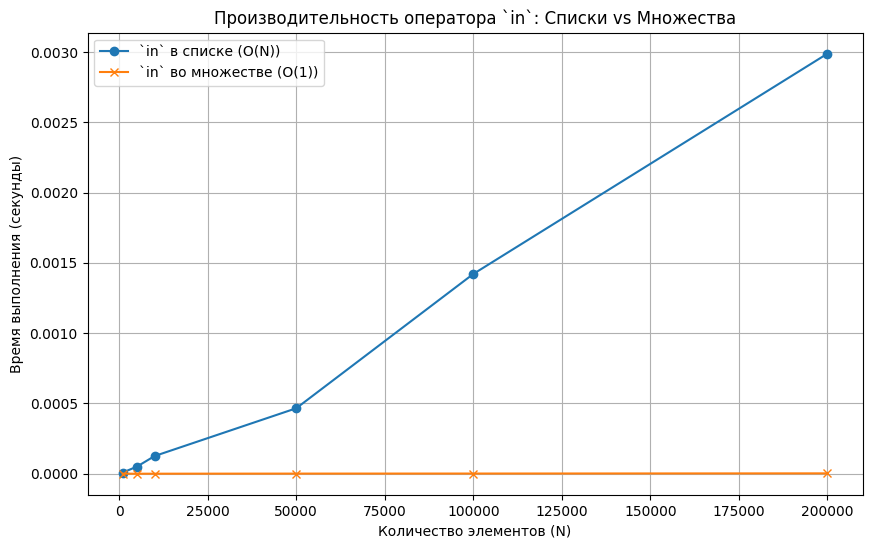

In [18]:
import timeit
import matplotlib.pyplot as plt

def in_list_performance(n):
    """Измеряет время для оператора 'in' в списке."""
    setup_code = f"test_list = list(range({n}))"
    # Ищем элемент, который находится в конце списка, чтобы смоделировать
    # наихудший случай
    stmt = f"{n-1} in test_list"
    return timeit.timeit(stmt, setup=setup_code, number=1)

def in_set_performance(n):
    """Измеряет время для оператора 'in' во множестве."""
    setup_code = f"test_set = set(range({n}))"
    # Ищем элемент, который есть во множестве
    stmt = f"{n-1} in test_set"
    return timeit.timeit(stmt, setup=setup_code, number=1)

# Запускаем эксперимент с возрастающими размерами данных
sizes = [1000, 5000, 10000, 50000, 100000, 200000]
list_times = [in_list_performance(n) for n in sizes]
set_times = [in_set_performance(n) for n in sizes]

# Строим график, чтобы показать результаты
plt.figure(figsize=(10, 6))
plt.plot(sizes, list_times, label='`in` в списке (O(N))', marker='o')
plt.plot(sizes, set_times, label='`in` во множестве (O(1))', marker='x')
plt.title('Производительность оператора `in`: Списки vs Множества')
plt.xlabel('Количество элементов (N)')
plt.ylabel('Время выполнения (секунды)')
plt.grid(True)
plt.legend()
plt.show()